#### PROBLEM STATEMENT for ANN:
##### Dataset Link - advertising-1.csv download

##### In this assignment you will be working with a dummy advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. you will try to create a model that will predict whether or not they will click on an ad based on the features of that user.

##### This data set contains the following features:
* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': customer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

##### * Included Required Library

In [351]:
import os
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

##### * Importing the dataset

In [352]:
PAR_FOLDER=os.getcwd()
print(PAR_FOLDER)
input_data_file=os.path.join(PAR_FOLDER, 'advertising-1.csv')
dataset = pd.read_csv(input_data_file)

C:\Users\kdevanand\ML\Assignment2


##### * Dataset head and Info

In [353]:
display(dataset.head())
display(dataset.info())

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


None

##### * Boxplot and Outliers

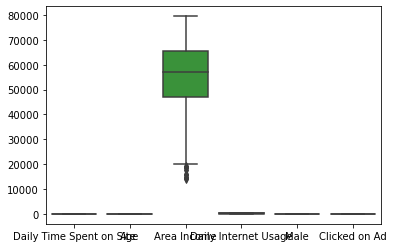

In [354]:
sns.boxplot(data=dataset)

##### * Boxplot Without Outliers

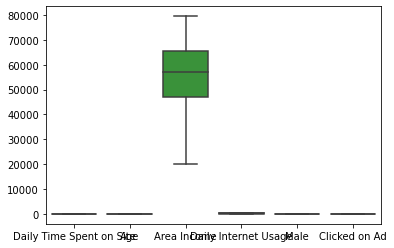

In [355]:
sns.boxplot(data=dataset, showfliers=False)

##### * Heat Map of Dataset

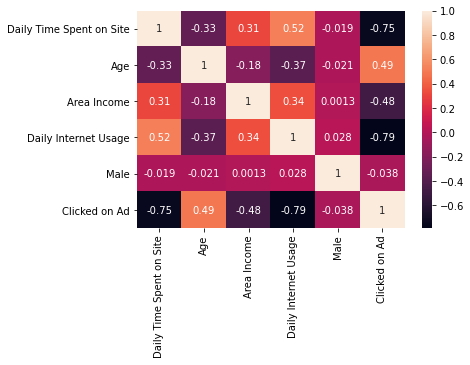

In [356]:
sns.heatmap(dataset.corr(), annot=True)

##### * Separating the Ad_text, City and Country into different dataset for processing they contain string values

In [357]:
ad_text = dataset["Ad Topic Line"]
city_text = dataset["City"]
country_text = dataset["Country"]

##### *Creating the Label Dataset Y which is the outcome

In [358]:
Y = dataset["Clicked on Ad"].values
print("Clicked on Ad =",Y[Y==1].shape[0])
print("Not Clicked on Ad =",Y[Y==0].shape[0])

Clicked on Ad = 500
Not Clicked on Ad = 500


##### * Stripping Timestamp as it does not impact the model

In [359]:
dataset = dataset.drop(columns=["Timestamp"])

##### * Stripping Ad Topic, City and Country which will be merged back later post Label Encoding and One Hot Encoding

In [360]:
dataset = dataset.drop(columns=["Ad Topic Line", "City", "Country"])

##### * Stripping Clicked On Ad column as it is moved to Label dataset Y

In [361]:
dataset = dataset.drop(columns=["Clicked on Ad"])

##### * Getting only first word of the "Ad Topic" which give the verb - call to action

In [362]:
for i in range(0, len(ad_text)):
    splitted = ad_text[i].split()
    ad_text[i] = splitted[0]

##### * Label Encoding the City, Country and Ad Topic

In [363]:
label_encoder = LabelEncoder()
ad_text = label_encoder.fit_transform(ad_text)
city_text = label_encoder.fit_transform(city_text)
country_text = label_encoder.fit_transform(country_text)

##### * One Hot Encoding City, Country and Ad Topic and converting to its respective dataframe

In [364]:
onehotencoder = OneHotEncoder(handle_unknown="ignore")
city = onehotencoder.fit_transform(city_text.reshape(-1, 1)).toarray()
city_df = pd.DataFrame(city)
ad = onehotencoder.fit_transform(ad_text.reshape(-1, 1)).toarray()
ad_df = pd.DataFrame(ad)
country = onehotencoder.fit_transform(country_text.reshape(-1, 1)).toarray()
country_df = pd.DataFrame(country)

##### * Merging all  dataset, Country, City and Ad Topic dataframes to create X --> which is the feature dataset

In [365]:
V = pd.merge(dataset, city_df, left_index=True, right_index=True)
Z = pd.merge(V, country_df, left_index=True, right_index=True)
X = pd.merge(Z, ad_df, left_index=True, right_index=True)

##### * Splitting the data into test and training sets. Using 20% of the data for test and 80% for training.

In [366]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

##### * Feature Scaling

In [367]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##### * ANN model
##### * Fine tuning the input,hidden nodes and Input dimensions to get high accuracy as possible

In [368]:
classifier = Sequential()
classifier.add(Dense(700,  activation='relu'))
classifier.add(Dense(700,  activation='relu'))
classifier.add(Dense(1,  activation='sigmoid'))

##### * Compile ANN

In [369]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##### * Fitting the ANN to training data set

In [370]:
classifier.fit(X_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
80/80 [==============================] - 1s 7ms/step - loss: 0.6959 - accuracy: 0.6203
Epoch 2/10
80/80 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.9984
Epoch 3/10
80/80 [==============================] - 1s 8ms/step - loss: 3.5537e-04 - accuracy: 1.0000
Epoch 4/10
80/80 [==============================] - 1s 9ms/step - loss: 2.0795e-04 - accuracy: 1.0000
Epoch 5/10
80/80 [==============================] - 1s 9ms/step - loss: 1.3887e-04 - accuracy: 1.0000
Epoch 6/10
80/80 [==============================] - 1s 8ms/step - loss: 1.3461e-04 - accuracy: 1.0000
Epoch 7/10
80/80 [==============================] - 1s 9ms/step - loss: 1.0342e-04 - accuracy: 1.0000
Epoch 8/10
80/80 [==============================] - 1s 8ms/step - loss: 8.1953e-05 - accuracy: 1.0000: 0s - loss: 9.2961e
Epoch 9/10
80/80 [==============================] - 1s 8ms/step - loss: 6.3750e-05 - accuracy: 1.0000
Epoch 10/10
80/80 [==============================] - 1s 9ms/step - los

##### * Predicting the test dataset.

In [371]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

##### * Print the results of the ANN model.

In [372]:
eval_model = classifier.evaluate(X_train, y_train)
print(f"Loss & Accuracy of the model built: {eval_model}\n")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")
cm1=classification_report(y_test, y_pred)
print(f"Classification Report:\n {cm1}")
cm2=accuracy_score(y_test,y_pred)
print(f"ACCURACY : {cm2}")

25/25 [==============================] - 0s 2ms/step - loss: 5.1735e-05 - accuracy: 1.0000
Loss & Accuracy of the model built: [5.1735063607338816e-05, 1.0]

Confusion Matrix:
 [[91 12]
 [10 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       103
           1       0.88      0.90      0.89        97

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

ACCURACY : 0.89


##### TOTAL ACCURACY OF MODEL = 89.0%
##### CONCLUSItON : If We increase epoches value more like >=100, then model will learn more and Accuracy rate will increase more than 90%, have seen that Accuracy is going upto 93% 